In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
wine = load_wine() # 导入红酒数据集

In [3]:
wine.data # 数据

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.target # 标签

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1) # 用pandas将data和target合并为一张表

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0


In [6]:
wine.feature_names # 特征名称

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names # 标签名称

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3) # train_test_split里有三个参数，特征、标签、测试样本尺寸

In [9]:
Xtrain.shape

(124, 13)

In [10]:
wine.data.shape

(178, 13)

In [16]:
# 开始建模
clf = tree.DecisionTreeClassifier(criterion="entropy") # 实例化
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9074074074074074

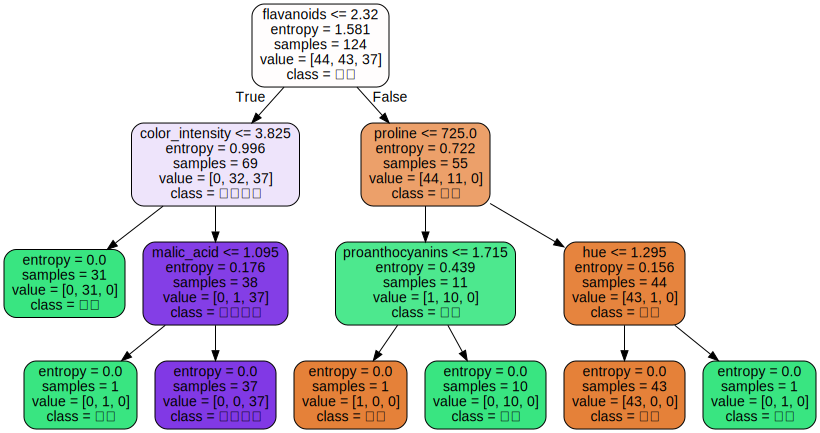

In [13]:
feature_names = wine.feature_names
import graphviz
dot_data = tree.export_graphviz(clf 
                                ,feature_names=feature_names
                                ,class_names=["琴酒", "雪莉", "贝尔摩德"]
                                ,filled=True # 颜色
                                ,rounded=True # 圆、矩形框
                               )
graph = graphviz.Source(dot_data)
graph

In [14]:
clf.feature_importances_  # 非常重要的属性和接口

array([0.        , 0.03403357, 0.        , 0.        , 0.        ,
       0.        , 0.44678588, 0.        , 0.02466235, 0.31662576,
       0.03512595, 0.        , 0.14276649])

In [15]:
[*zip(feature_names, clf.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.034033569212023836),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.44678587619967164),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.02466235149355429),
 ('color_intensity', 0.3166257594588023),
 ('hue', 0.035125952748973496),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.1427664908869745)]

In [34]:
# 增加random_state
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=30) # 实例化
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9259259259259259

In [36]:
# 增加splitter
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ) # 实例化
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9259259259259259

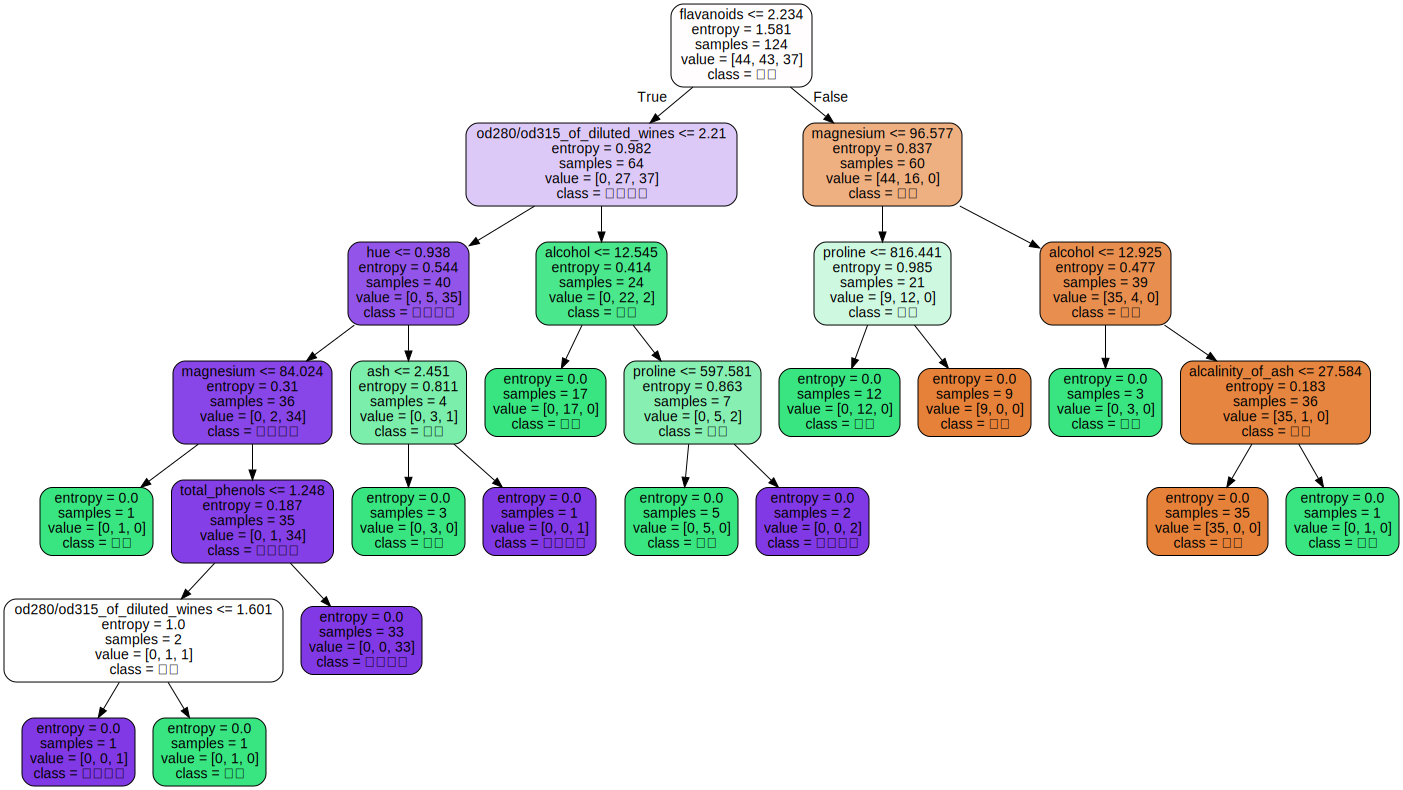

In [37]:
feature_names = wine.feature_names
import graphviz
dot_data = tree.export_graphviz(clf 
                                ,feature_names=feature_names
                                ,class_names=["琴酒", "雪莉", "贝尔摩德"]
                                ,filled=True # 颜色
                                ,rounded=True # 圆、矩形框
                               )
graph = graphviz.Source(dot_data)
graph

In [39]:
# 对训练集的拟合程度如何
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

# 剪枝

## 1、max_depth
### 限制树的最大深度，超过设定深度的树枝全部剪掉，建议从max_depth=3开始尝试

## 2、min_samples_leaf & min_samples_split
### min_samples_leaf限定，一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向取发生。搭配max_dapth使用，会有神奇的效果，建议从min_samples_leaf=5开始尝试。
### min_samples_split限定，一个节点必须包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生

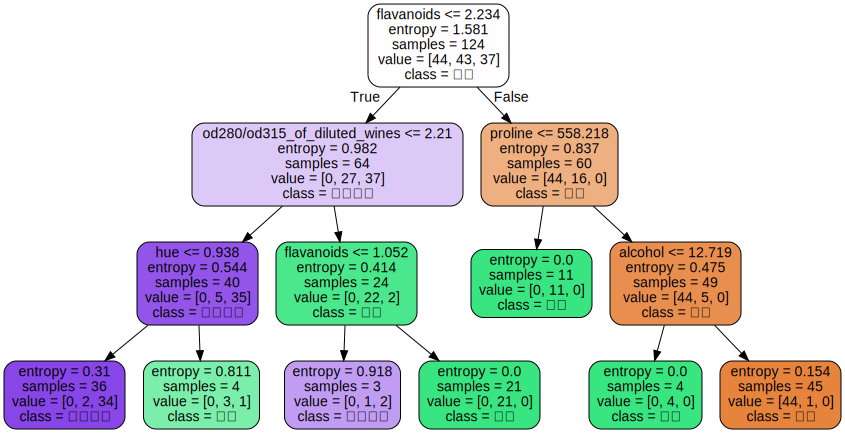

In [51]:
# 剪枝
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=3
                                #  ,min_samples_leaf=10 # 保证节点在分枝后样本数量大于等于10时才能分枝
                                #  ,min_samples_split=61 # 节点包含样本数量大于等于61时才能分枝
                                  ) # 实例化
clf = clf.fit(Xtrain, Ytrain)

dot_data = tree.export_graphviz(clf 
                                ,feature_names=feature_names
                                ,class_names=["琴酒", "雪莉", "贝尔摩德"]
                                ,filled=True # 颜色
                                ,rounded=True # 圆、矩形框
                               )
graph = graphviz.Source(dot_data)
graph

In [42]:
score = clf.score(Xtest, Ytest)
score

0.9444444444444444

## 3、max_features & min_impurity_decrease
### max_features限制，分枝时考虑特征个数，超过限制个数的特征都会被舍弃
### max_features是用来限制高维度数据的过拟合的剪枝参数，但方法比较暴力，是直接限制可以使用的特征数量而强行使决策树停下的参数，在不知道决策树中各个特征的重要性的情况下，强行设定这个参数可能会导致模型学习不足。
### min_impurity_decrease限制信息增益的大小，信息增益小于设定数值的分枝不会发生。(min_impurity_split)

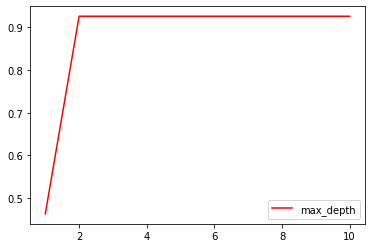

In [53]:
# 选择参数
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                      ,criterion="entropy"
                                      ,random_state=30
                                      )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)

plt.plot(range(1,11), test, color="red", label="max_depth")
plt.legend()
plt.show()

# 重要的属性和接口

In [54]:
# apply 返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([ 4,  9,  4,  2, 12,  2,  9,  4,  4,  2,  2,  4,  9,  4,  9,  2,  9,
        2,  2, 12, 12,  5,  4, 12,  2,  2,  2,  4,  4, 12, 12,  2, 12, 12,
        2,  9, 12,  4, 12,  9, 12,  2, 12, 12,  4, 12,  4,  2,  5,  2,  4,
        8,  2,  2], dtype=int64)

In [55]:
# predict返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1,
       2, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0,
       2, 0, 2, 1, 1, 1, 2, 0, 1, 1])